In [1]:
import seaborn as sns

import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import torch
from torch import nn
from torchsummary import summary
from torch.autograd import Variable

import scikitplot as skplt

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
iris = sns.load_dataset('iris')
sns.set(style="ticks", color_codes=True)

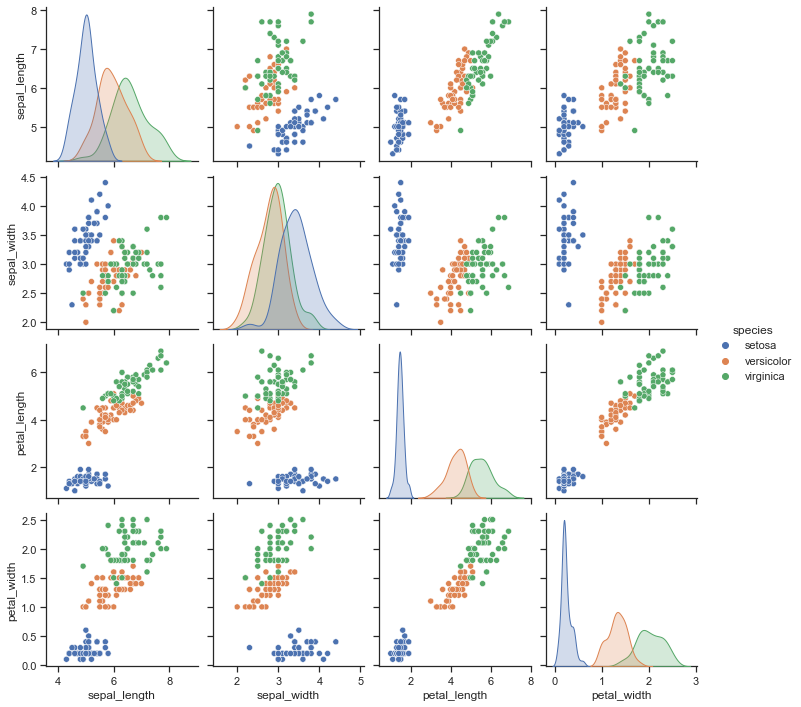

In [3]:
g = sns.pairplot(iris, hue='species')

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
classes = {'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [6]:
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values

In [7]:
y = iris['species'].apply(lambda x: classes[x]).values

In [8]:
X_train_array, X_test_array, y_train_array, y_test_array = train_test_split(X, y, test_size=0.33, random_state=0)

# y_train_array = np.expand_dims(y_train_array, axis=0)
# y_test_array = np.expand_dims(y_test_array, axis=0)

print(X_train_array[:5], np.shape(X_train_array))

print(y_train_array[:5], np.shape(y_train_array))

print(X_test_array[:5], np.shape(X_test_array))

print(y_test_array[:5], np.shape(y_test_array))

[[5.6 2.5 3.9 1.1]
 [7.7 3.  6.1 2.3]
 [6.3 3.3 4.7 1.6]
 [5.5 2.4 3.8 1.1]
 [6.3 2.7 4.9 1.8]] (100, 4)
[1 2 1 1 2] (100,)
[[5.8 2.8 5.1 2.4]
 [6.  2.2 4.  1. ]
 [5.5 4.2 1.4 0.2]
 [7.3 2.9 6.3 1.8]
 [5.  3.4 1.5 0.2]] (50, 4)
[2 1 0 2 0] (50,)


In [9]:
iris_model = nn.Sequential(
    torch.nn.Linear(4,10),
    torch.nn.SELU(),
    torch.nn.Linear(10,3),
    torch.nn.Softmax(dim=1)
)

print(iris_model)

Sequential(
  (0): Linear(in_features=4, out_features=10, bias=True)
  (1): SELU()
  (2): Linear(in_features=10, out_features=3, bias=True)
  (3): Softmax(dim=1)
)


In [10]:
summary(iris_model, (1,4))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 10]              50
              SELU-2                [-1, 1, 10]               0
            Linear-3                 [-1, 1, 3]              33
           Softmax-4                 [-1, 1, 3]               0
Total params: 83
Trainable params: 83
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [11]:
X_train = Variable(
    torch.from_numpy(X_train_array).float()
)
y_train = Variable(
    torch.from_numpy(y_train_array).long()
)
X_test = Variable(
    torch.from_numpy(X_test_array).float()
)
y_test = Variable(
    torch.from_numpy(y_test_array).long()
)

In [12]:
y_train

tensor([1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0,
        1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0,
        2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2,
        0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0,
        2, 1, 2, 0])

## Training

In [13]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(
    iris_model.parameters(), lr=0.01
)
for epoch in range(1000):
    optimizer.zero_grad()
    out = iris_model(X_train)
    loss = criterion(out, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print('number of epoch:', epoch, 'loss:', loss)

number of epoch: 0 loss: tensor(1.0806, grad_fn=<NllLossBackward>)
number of epoch: 10 loss: tensor(0.7782, grad_fn=<NllLossBackward>)
number of epoch: 20 loss: tensor(0.7330, grad_fn=<NllLossBackward>)
number of epoch: 30 loss: tensor(0.7021, grad_fn=<NllLossBackward>)
number of epoch: 40 loss: tensor(0.6709, grad_fn=<NllLossBackward>)
number of epoch: 50 loss: tensor(0.6443, grad_fn=<NllLossBackward>)
number of epoch: 60 loss: tensor(0.6272, grad_fn=<NllLossBackward>)
number of epoch: 70 loss: tensor(0.6184, grad_fn=<NllLossBackward>)
number of epoch: 80 loss: tensor(0.6116, grad_fn=<NllLossBackward>)
number of epoch: 90 loss: tensor(0.6055, grad_fn=<NllLossBackward>)
number of epoch: 100 loss: tensor(0.6021, grad_fn=<NllLossBackward>)
number of epoch: 110 loss: tensor(0.5984, grad_fn=<NllLossBackward>)
number of epoch: 120 loss: tensor(0.5958, grad_fn=<NllLossBackward>)
number of epoch: 130 loss: tensor(0.5938, grad_fn=<NllLossBackward>)
number of epoch: 140 loss: tensor(0.5920, gra

[Text(0, 0, 'setosa'), Text(0, 1, 'versicolor'), Text(0, 2, 'virginica')]

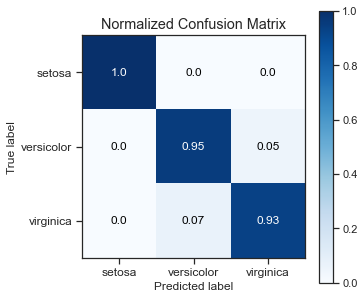

In [14]:
fig, ax = plt.subplots(figsize=[5,5])

y_pred = iris_model(X_test).detach().numpy()
skplt.metrics.plot_confusion_matrix(
    y_test,
    y_pred.argmax(axis=1),
    normalize=True,
    ax=ax
)
labels = ['setosa', 'versicolor', 'virginica']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)